In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from utils import seed
from utils import clipp_iqr
from utils import scale

In [23]:
X = pd.read_csv('./datamart/data_project_nel.csv')
X

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
0,7,7.750000,414,56.0,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,0.077973,0.0
1,8,9.083333,357,78.0,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,0.014157,0.0
2,6,7.666667,315,69.0,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,0.045213,12.8
3,7,8.666667,362,69.0,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,0.061713,16.2
4,5,6.500000,427,58.0,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,0.444858,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,1.916667,291,NaN,3.765704,557.993151,35.426804,3.178905,2.563574,1.206434,0.0,0.000000,0.079088,0.0
320,1,1.750000,310,NaN,3.836903,549.466238,36.584194,1.633004,2.951613,2.622951,0.0,0.000000,0.240437,0.0
321,1,1.833333,293,NaN,3.755973,579.557823,37.039590,1.864855,2.747440,3.726708,0.0,0.000000,0.150311,0.0
322,1,1.666667,293,NaN,3.939010,546.159864,36.980546,3.395705,3.112628,1.535088,0.0,0.000000,0.195175,0.0


In [3]:
X.columns

Index(['lactation', 'delivery_age_years', 'dim', 'dry_days', 'forage_kg_day',
       'rumination_min_day', 'milk_kg_day', 'milk_kg_min_robot',
       'milkings_day', 'errors_by_100_milkings', 'high_cdt_by_100_milkings',
       'watery_by_100_milkings', 'refusals_by_milking',
       'colostrum_separated_kg'],
      dtype='object')

In [4]:
X.isna().sum()

lactation                     0
delivery_age_years            0
dim                           0
dry_days                    147
forage_kg_day                 0
rumination_min_day            0
milk_kg_day                   0
milk_kg_min_robot             0
milkings_day                  0
errors_by_100_milkings        0
high_cdt_by_100_milkings      0
watery_by_100_milkings        0
refusals_by_milking           0
colostrum_separated_kg        0
dtype: int64

In [5]:
y1 = pd.read_csv('./datamart/y_lactose.csv')
y2 = pd.read_csv('./datamart/y_protein.csv')
y3 = pd.read_csv('./datamart/y_fat.csv')

In [8]:
# y1_train_scaled = pd.DataFrame(PowerTransformer().fit_transform(y1_train), columns = y1_train.columns)
# y1_test_scaled = pd.DataFrame(PowerTransformer().fit_transform(y1_test), columns = y1_test.columns)
# y1_train_scaled.to_csv('./datamart/y_lactose_train_scaled.csv', index = False)
# y1_test_scaled.to_csv('./datamart/y_lactose_test_scaled.csv', index = False)

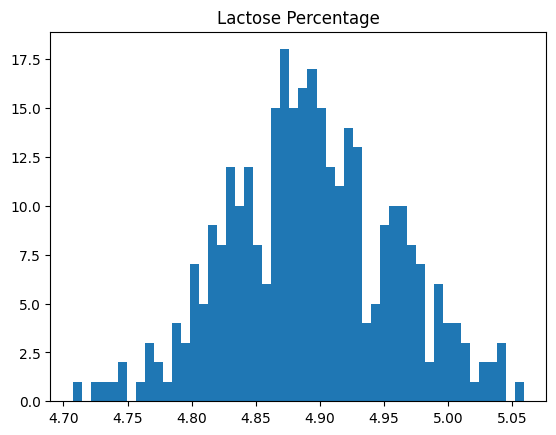

In [10]:
plt.hist(y1, bins=50, color='tab:blue')
plt.title('Lactose Percentage')
plt.show()

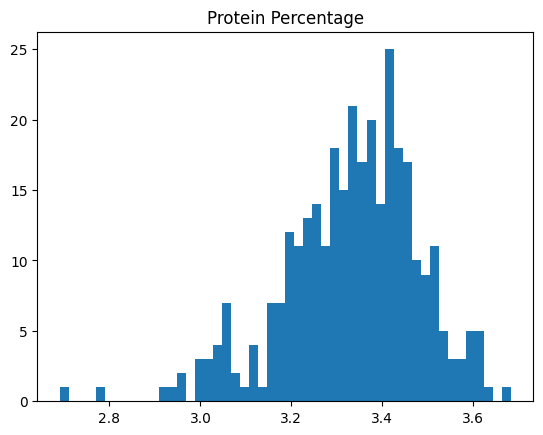

In [11]:
plt.hist(y2, bins=50, color='tab:blue')
plt.title('Protein Percentage')
plt.show()

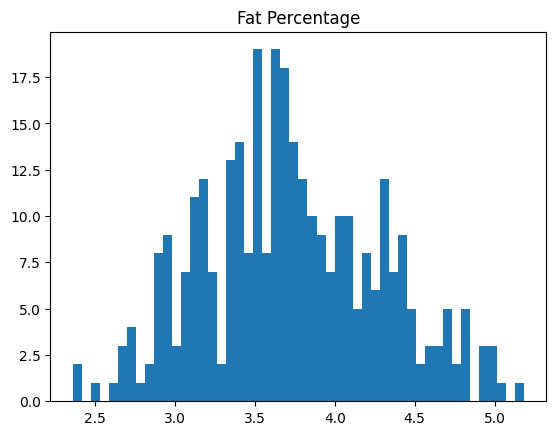

In [12]:
plt.hist(y3, bins=50, color='tab:blue')
plt.title('Fat Percentage')
plt.show()

In [14]:
X.describe()

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
count,226.000000,226.000000,226.000000,122.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,2.035398,3.030605,324.504425,66.131148,4.669961,527.932703,39.822072,2.855684,2.950297,1.564730,0.198019,0.080142,0.249970,12.299115
std,1.299088,1.415245,39.964123,9.696170,0.576797,53.274525,6.429310,0.840712,0.551652,2.775660,0.850474,0.411716,0.242134,15.782927
min,1.000000,1.750000,249.000000,22.000000,3.013143,337.500000,24.246439,1.227250,2.016340,0.000000,0.000000,0.000000,0.003241,0.000000
25%,1.000000,1.916667,297.000000,61.000000,4.295622,490.968463,35.048643,2.174841,2.514447,0.234134,0.000000,0.000000,0.085095,0.000000
50%,2.000000,2.750000,313.000000,66.000000,4.666317,537.422633,39.510841,2.811321,2.869661,0.857187,0.000000,0.000000,0.184893,6.300000
75%,3.000000,3.750000,340.000000,71.000000,5.011465,565.650328,44.005668,3.374601,3.391645,1.666279,0.000000,0.000000,0.320169,20.350000
max,8.000000,9.083333,478.000000,112.000000,6.340225,638.546053,59.722312,5.526386,4.378049,25.378347,7.668712,3.826955,1.452590,82.500000


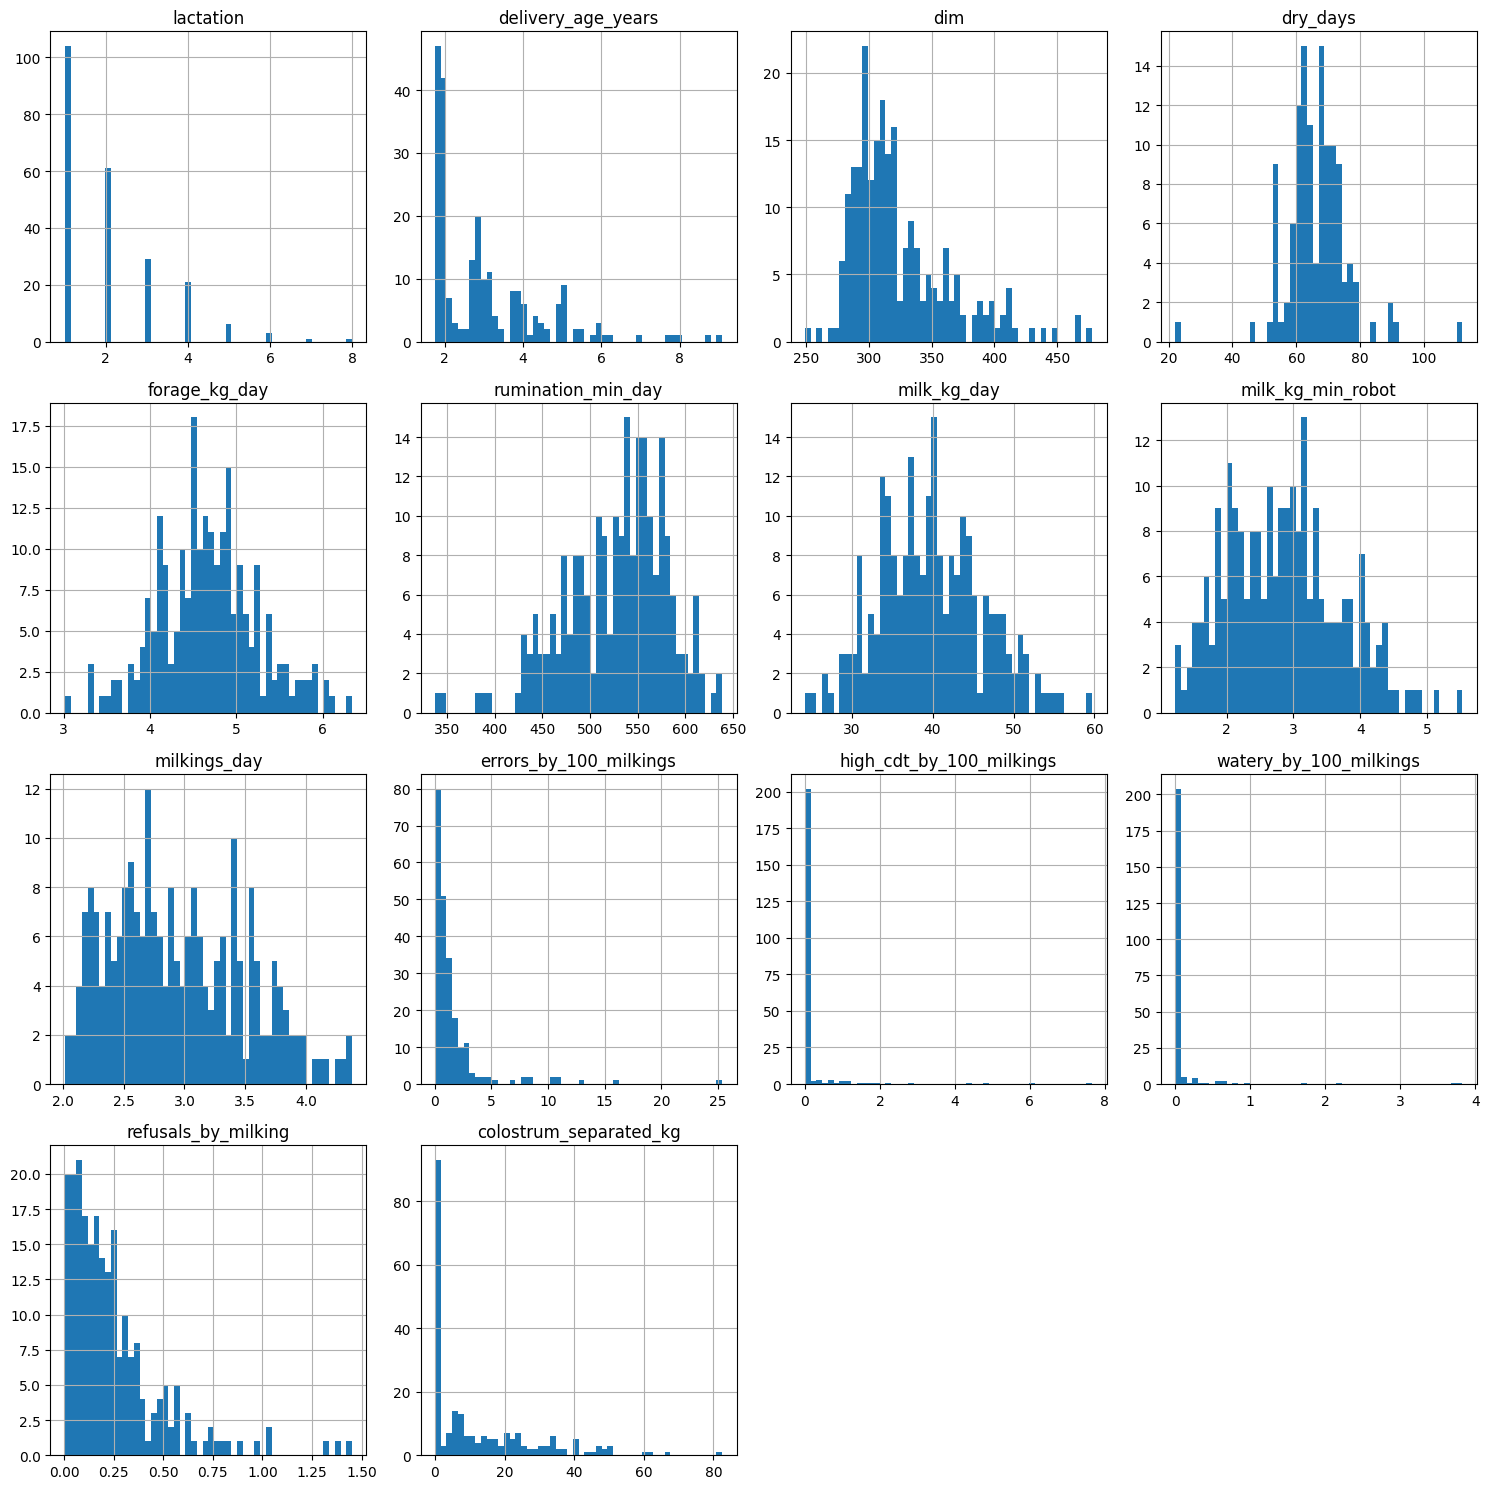

In [15]:
X.hist(figsize=(15, 15), bins=50)
plt.grid(False)
plt.tight_layout()
plt.show()

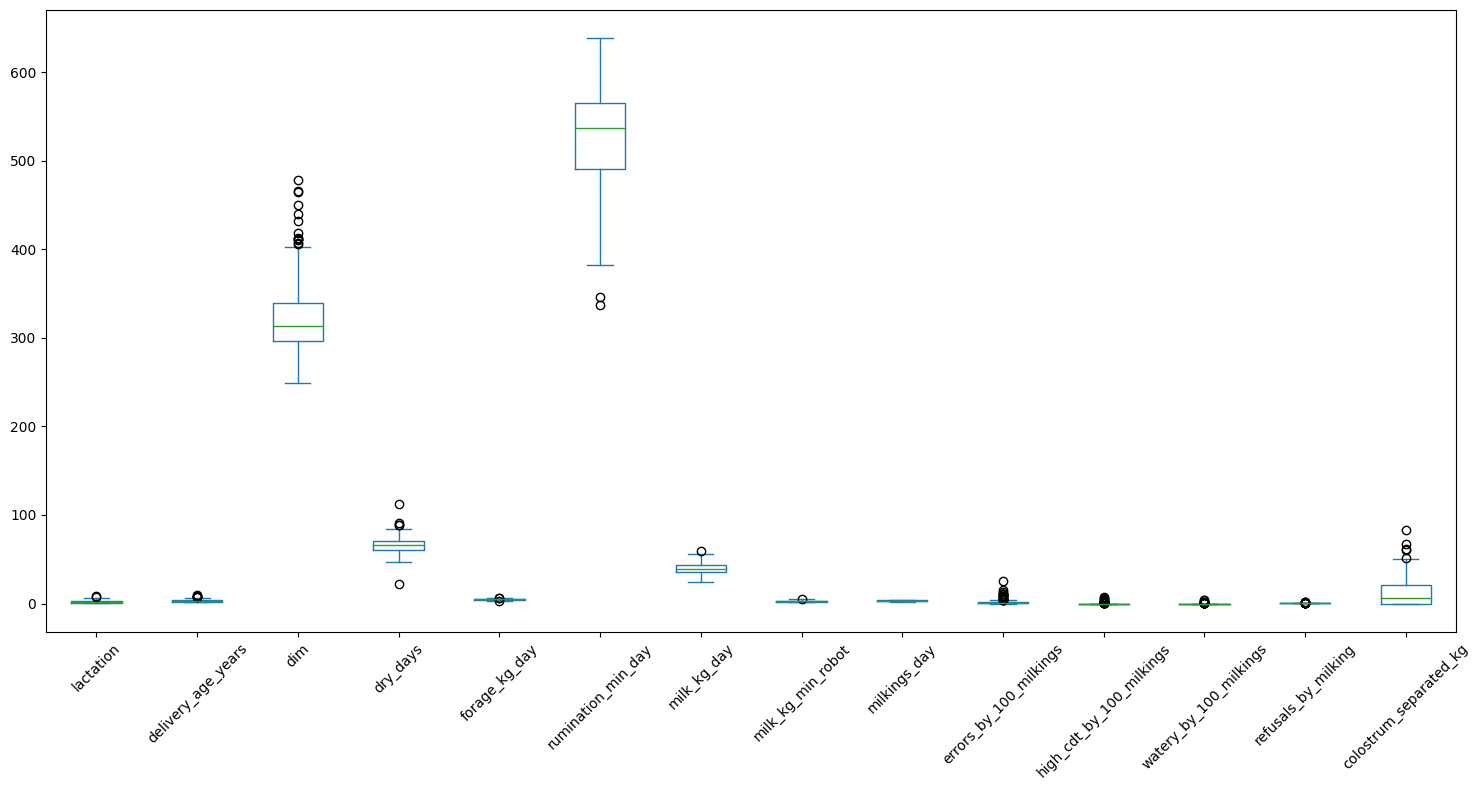

In [16]:
X.plot(kind='box', figsize=(15, 8))
plt.xticks(ticks=range(1, len(X.columns) + 1), labels=X.columns, rotation=45)
plt.tight_layout()
plt.show()


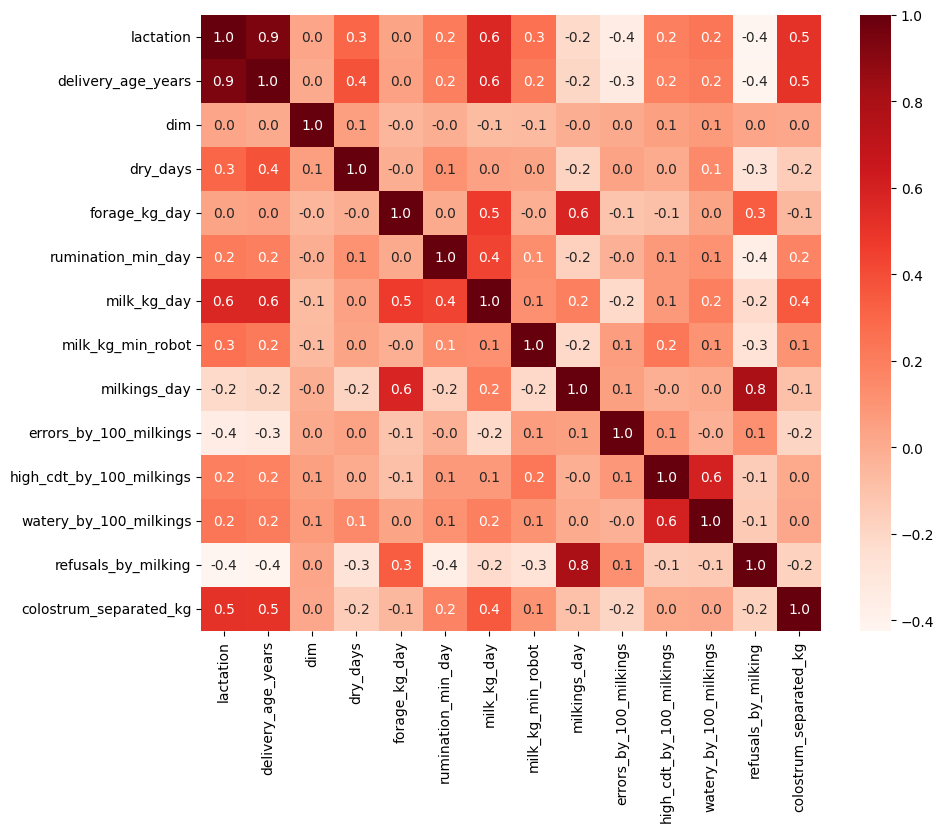

In [17]:
def cor_heatmap(cor):
    plt.figure(figsize=(10,8))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1f')
    plt.show()
cor_heatmap(X.corr('spearman'))

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


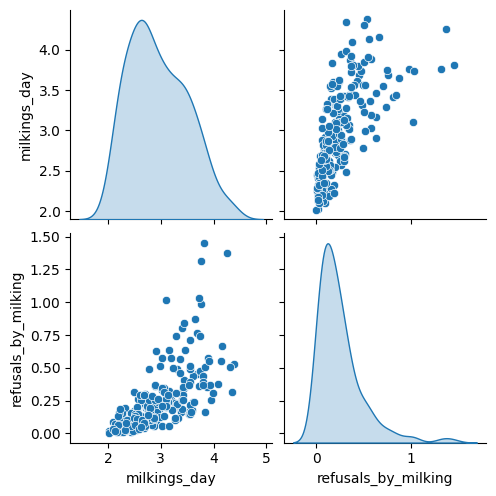

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


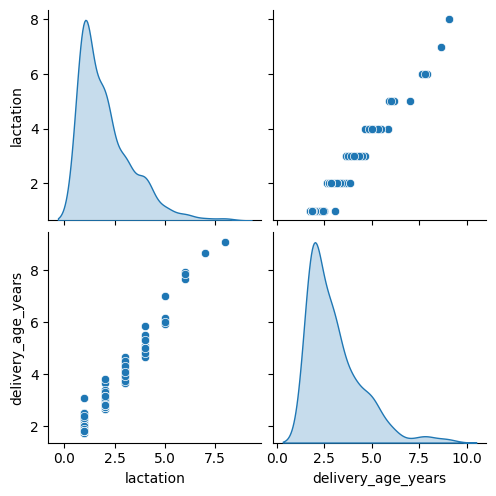

In [18]:
sns.pairplot(X_train[['milkings_day', 'refusals_by_milking']], diag_kind='kde')
plt.show()
sns.pairplot(X_train[['lactation', 'delivery_age_years']], diag_kind='kde')
plt.show()

In [20]:
columns_to_clip = ['dim', 'dry_days', 'rumination_min_day', 'milk_kg_day', 'colostrum_separated_kg']
X_train_clipped = X_train.copy()
X_train_clipped[columns_to_clip] = winsorize_iqr(X[columns_to_clip], X_train[columns_to_clip])


X_train_clipped_scaled = pd.DataFrame(pt.fit_transform(X_train_clipped), columns=X_train.columns)



X_train_clipped_scaled.hist(figsize=(15, 15), bins=50)
plt.grid(False)
plt.tight_layout()
plt.show()


KeyboardInterrupt



In [ ]:
X_test_clipped = X_test.copy()
X_test_clipped[columns_to_clip] = winsorize_iqr(X_train[columns_to_clip], X_test[columns_to_clip], multiplier=2)
X_test_clipped_scaled = pd.DataFrame(pt.transform(X_test_clipped), columns=X_test.columns)

In [ ]:
X_train_clipped_scaled

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
0,0.410965,0.639849,-0.317653,-0.464450,0.458492,-0.840419,-0.056131,-1.178970,1.295452,1.172186,-0.378296,-0.335100,1.767350,-1.111031
1,-1.010644,-0.982619,-1.628300,NaN,-0.208821,-1.380722,-1.375078,0.644808,-1.214644,-0.396346,-0.378296,-0.335100,0.025699,-1.111031
2,-1.010644,-0.982619,-0.072383,NaN,0.572152,-1.659106,-0.393373,-0.510456,0.819267,-1.381045,-0.378296,-0.335100,1.461232,-1.111031
3,0.410965,0.158896,0.355794,-1.627905,2.343168,0.200344,1.513006,0.936109,2.127269,0.938870,2.651966,3.108251,1.379064,1.071670
4,0.410965,0.519857,1.342097,0.376061,-0.932789,0.668738,0.829167,-0.409469,-0.933276,0.403412,2.831079,3.138226,-0.933355,0.259815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-1.010644,-1.145262,-0.928617,NaN,-0.380686,-1.281347,-1.781590,-0.145812,0.102761,2.379123,-0.378296,-0.335100,0.462160,0.276978
222,-1.010644,-0.213040,0.241192,NaN,0.000752,0.082023,0.072528,0.068289,-0.620630,-0.056837,-0.378296,-0.335100,-1.390298,0.831495
223,0.410965,0.239143,-0.507490,-1.493403,0.795095,-0.127357,0.527715,-0.825459,-0.508582,-1.381045,-0.378296,-0.335100,-1.179348,0.783406
224,-1.010644,-1.145262,-1.211238,NaN,0.690580,0.974356,-0.368902,0.601801,0.246254,1.416943,-0.378296,-0.335100,0.162092,0.186211
